In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_voice_dataset.csv to gender_voice_dataset.csv


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.4 MB/s eta 0:00:00


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Import dataset


In [ ]:
gen = pd.read_csv('gender_voice_dataset.csv')
gen_data = pd.DataFrame(gen)
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,NaN,NaN,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,NaN,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3160.000000,3159.000000,3136.000000,3146.000000,3146.000000,3151.000000,3159.000000,3163.000000,3162.000000,3161.000000,2927.000000,3163.000000,3162.000000,3159.000000,3135.000000,3164.000000,3163.000000,3149.000000,3092.000000,3099.000000
mean,0.180920,0.057136,0.185742,0.140499,0.224738,0.084258,3.135167,36.609816,0.895110,0.408070,0.178120,0.180903,0.142816,0.036691,0.259036,0.829611,0.052622,5.053434,5.104075,0.177002
std,0.029930,0.016652,0.036186,0.048675,0.023641,0.042727,4.229875,135.030853,0.045006,0.177389,0.064196,0.029933,0.032307,0.018853,0.030092,0.525307,0.063234,3.525931,3.484114,0.117889
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163694,0.041965,0.169692,0.111131,0.208740,0.042549,1.649461,5.672263,0.861777,0.258112,0.140090,0.163628,0.117007,0.018192,0.253968,0.420105,0.007812,2.070312,2.568359,0.102399
50%,0.184852,0.059159,0.190073,0.140343,0.225668,0.094274,2.195317,8.318809,0.901823,0.396274,0.191650,0.184848,0.140519,0.045872,0.271186,0.766353,0.023438,4.992188,5.039062,0.141188
75%,0.199146,0.067038,0.210608,0.175948,0.243640,0.114167,2.928132,13.649354,0.928717,0.533184,0.224860,0.199154,0.169605,0.047904,0.277457,1.177637,0.070312,7.031250,7.148438,0.211464
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3160 non-null   float64
 1   sd        3159 non-null   float64
 2   median    3136 non-null   float64
 3   Q25       3146 non-null   float64
 4   Q75       3146 non-null   float64
 5   IQR       3151 non-null   float64
 6   skew      3159 non-null   float64
 7   kurt      3163 non-null   float64
 8   sp.ent    3162 non-null   float64
 9   sfm       3161 non-null   float64
 10  mode      2927 non-null   float64
 11  centroid  3163 non-null   float64
 12  meanfun   3162 non-null   float64
 13  minfun    3159 non-null   float64
 14  maxfun    3135 non-null   float64
 15  meandom   3164 non-null   float64
 16  mindom    3163 non-null   float64
 17  maxdom    3149 non-null   float64
 18  dfrange   3092 non-null   float64
 19  modindx   3099 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
gen_data.columns


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

**Null Detection and remove by using mean function**

In [ ]:
gen_data.isnull().sum()

,0
meanfreq,8
sd,9
median,32
Q25,22
Q75,22
IQR,17
skew,9
kurt,5
sp.ent,6
sfm,7


In [ ]:
gen_data.fillna({'meanfreq': gen_data['meanfreq'].mean()}, inplace=True)
gen_data.fillna({'sd': gen_data['sd'].mean()}, inplace=True)
gen_data.fillna({'median': gen_data['median'].mean()}, inplace=True)
gen_data.fillna({'Q25': gen_data['Q25'].mean()}, inplace=True)
gen_data.fillna({'Q75': gen_data['Q75'].mean()}, inplace=True)
gen_data.fillna({'IQR': gen_data['IQR'].mean()}, inplace=True)
gen_data.fillna({'skew': gen_data['skew'].mean()}, inplace=True)
gen_data.fillna({'kurt': gen_data['kurt'].mean()}, inplace=True)
gen_data.fillna({'sp.ent': gen_data['sp.ent'].mean()}, inplace=True)
gen_data.fillna({'sfm': gen_data['sfm'].mean()}, inplace=True)
gen_data.fillna({'mode': gen_data['mode'].mean()}, inplace=True)
gen_data.fillna({'centroid': gen_data['centroid'].mean()}, inplace=True)
gen_data.fillna({'meanfun': gen_data['meanfun'].mean()}, inplace=True)
gen_data.fillna({'minfun': gen_data['minfun'].mean()}, inplace=True)
gen_data.fillna({'maxfun': gen_data['maxfun'].mean()}, inplace=True)
gen_data.fillna({'meandom': gen_data['meandom'].mean()}, inplace=True)
gen_data.fillna({'mindom': gen_data['mindom'].mean()}, inplace=True)
gen_data.fillna({'maxdom': gen_data['maxdom'].mean()}, inplace=True)
gen_data.fillna({'dfrange': gen_data['dfrange'].mean()}, inplace=True)
gen_data.fillna({'modindx': gen_data['modindx'].mean()}, inplace=True)
gen_data.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


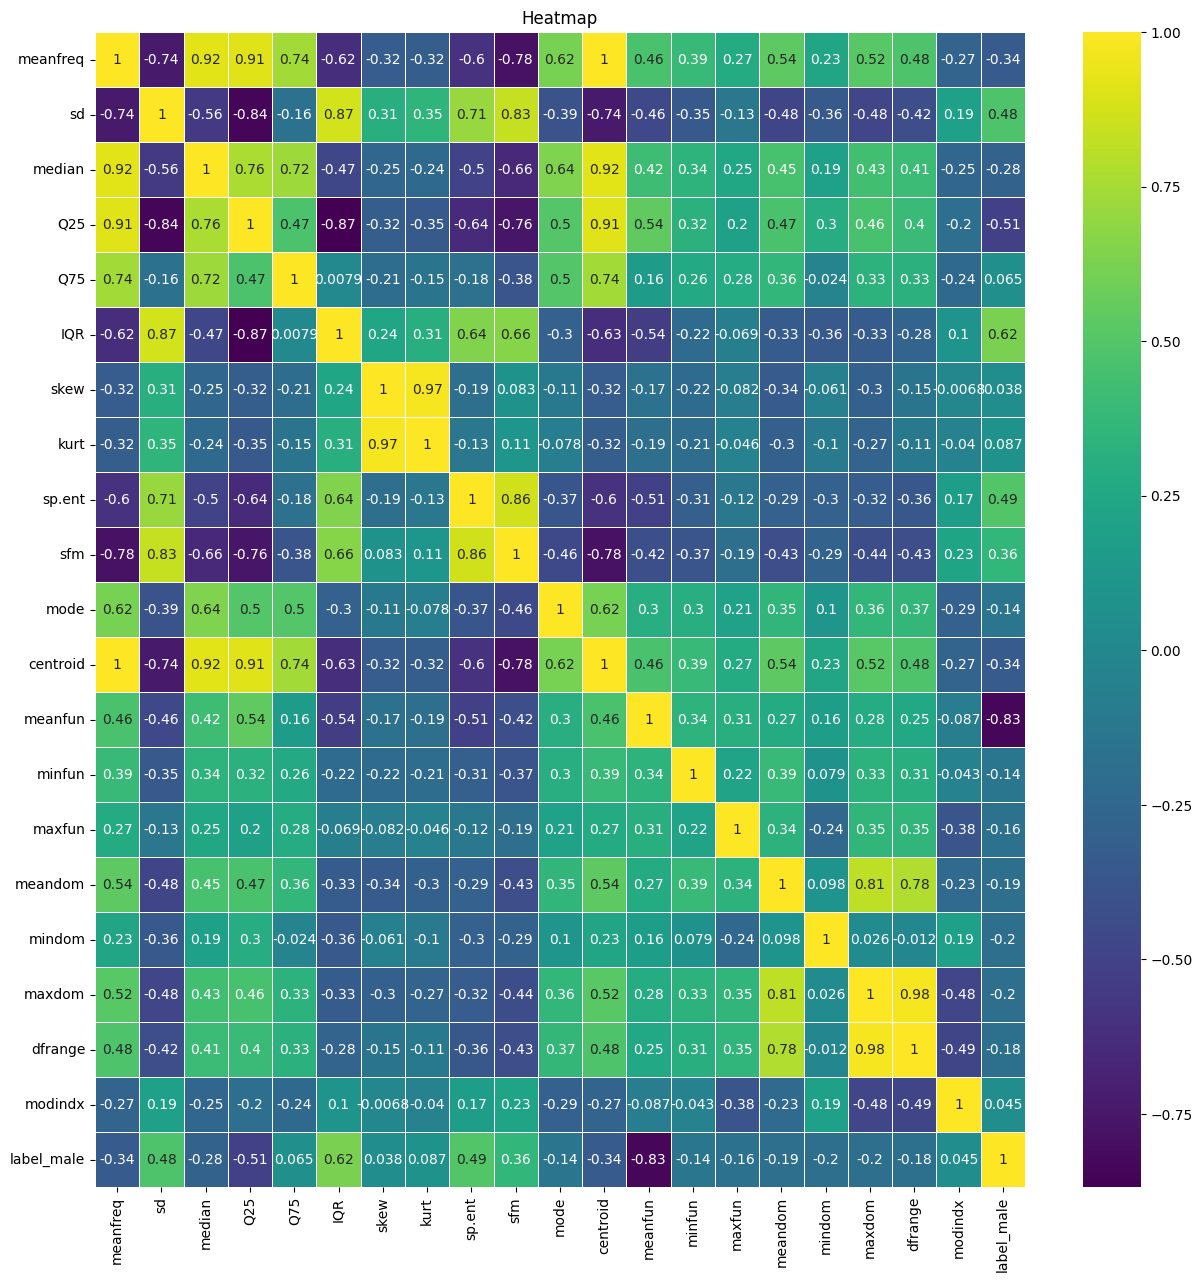

In [ ]:
# pd.get_dummies creates dummy variables for categorical features.
gen_data_encoded = pd.get_dummies(gen_data, drop_first=True)

# Heatmap and count plots visualize correlations and class distribution.
# Plot heatmap on encoded data
plt.figure(figsize=(15, 15))
sns.heatmap(gen_data_encoded.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap')
plt.show()

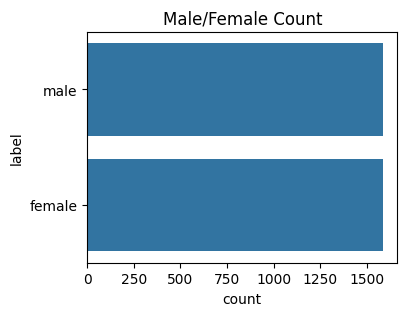

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(gen_data['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

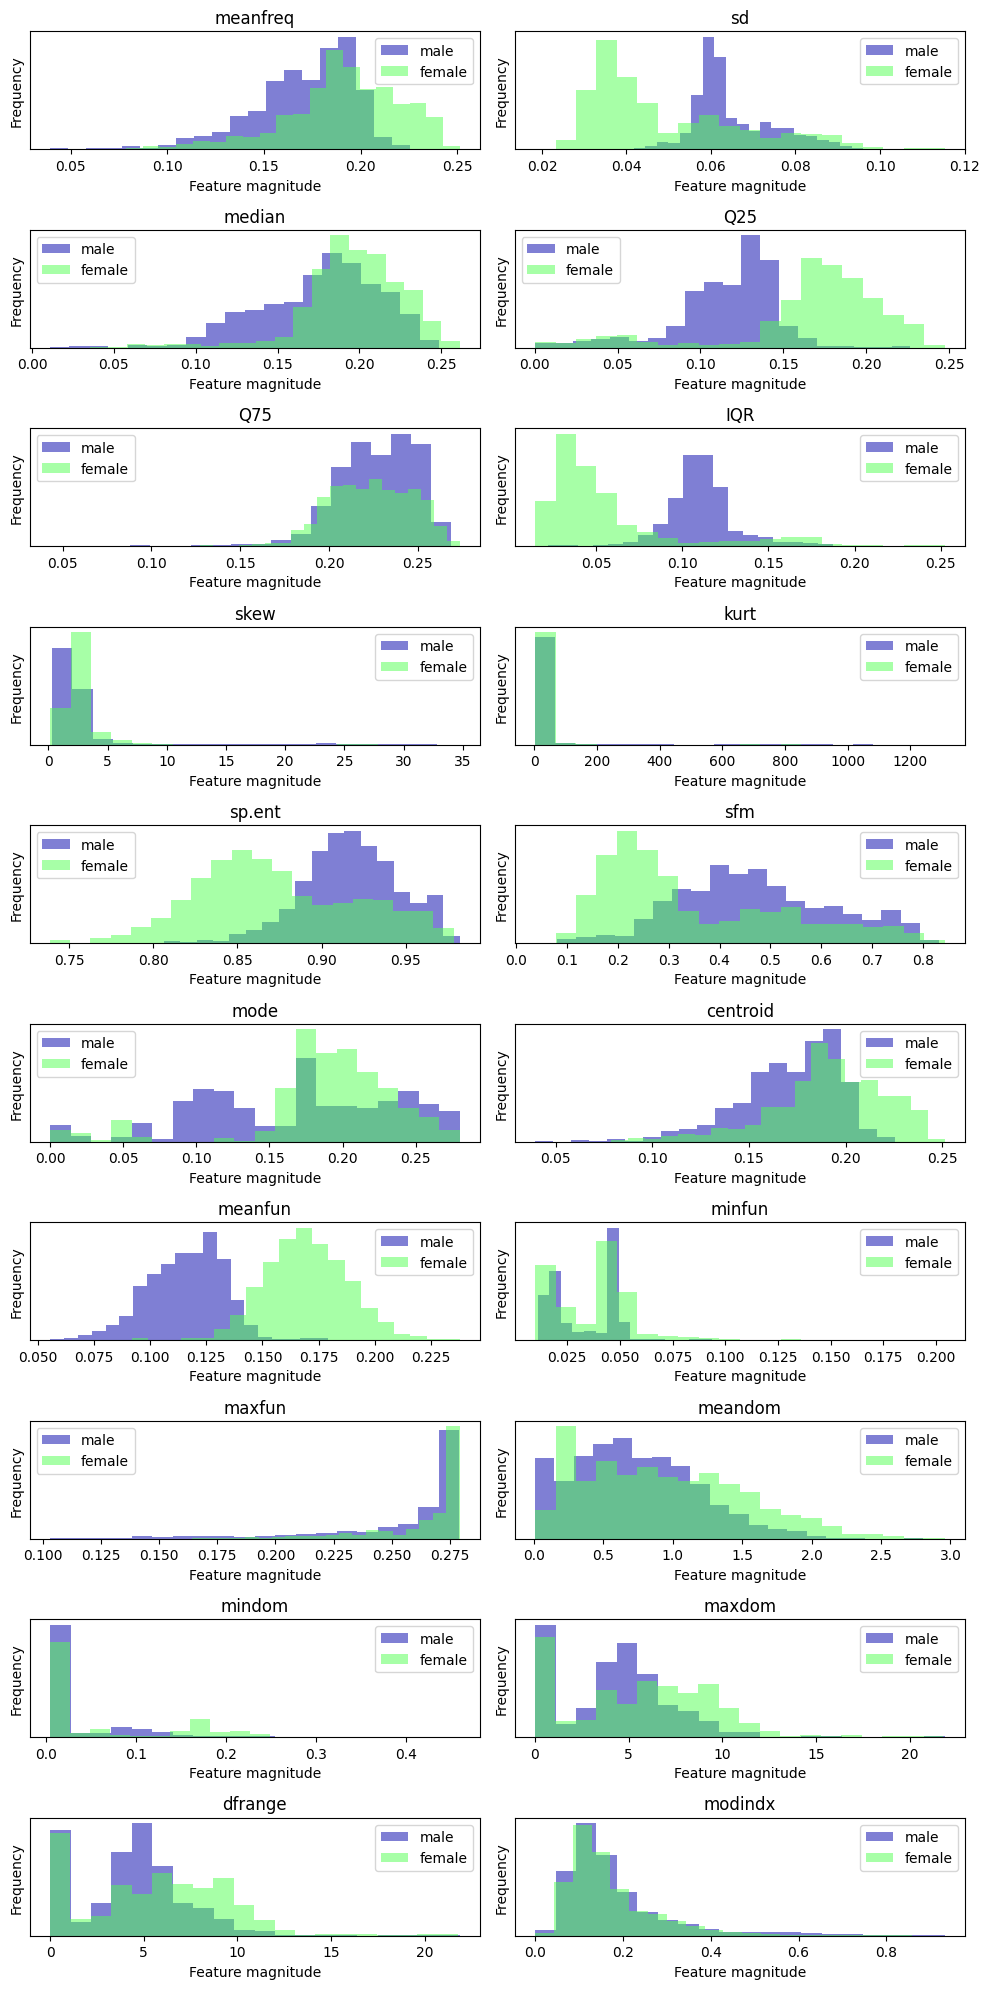

In [ ]:
#Plot the histograms
male = gen.loc[gen['label']=='male']
female = gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [ ]:
gen_new = gen_data.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [ ]:
gen_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

In [ ]:
y = gen_new['label']
X = gen_new.drop(['label'], axis = 1)

Imblance like Oversamplling (SMOTE) or undersampling techniques for balance the class distribution

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.2)

Use class_weight='balanced' parameter for adhust weight balance based on class frequencies


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced').fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


Use max_depth for regularization in random forest classifier

In [ ]:
#Train random forest model with max_depth
forest = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10).fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


Overfiting control & use penalty='l2' for regularization & Hyperparameter Tuning



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=1.0).fit(Xtrain, ytrain)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, Xtrain, ytrain, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())




from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_






Cross-validation scores: [0.89940828 0.9112426  0.90138067 0.90335306 0.91304348]
Average cross-validation score: 0.9056856187290968
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.9782982903384241


logistic Regression Model in normal way

> Add blockquote



In [ ]:
#Train logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42).fit(Xtrain, ytrain)
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")
print("Accuracy on training set: {:.2f}".format(log_reg.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(log_reg.score(Xtest, ytest)))

Logistic Regression
Accuracy on training set: 0.91
Accuracy on test set: 0.91


**Hybrid Model** ( Random forest and logistic regression )

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with equal weights
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)
hybrid_model = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='soft')
# hard: Uses majority voting based on the predicted & voting='soft' for probability-based voting

hybrid_model.fit(Xtrain, ytrain)
print("Hybrid Model")
print("Accuracy on training set: {:.2f}".format(hybrid_model.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(hybrid_model.score(Xtest, ytest)))

Hybrid Model
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [ ]:
#Import All model that we will implementing
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train support vector machine model
svm = SVC().fit(Xtrain, ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Support Vector Machine
Accuracy on training set: 0.73
Accuracy on test set: 0.73


In [ ]:
#Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42).fit(Xtrain, ytrain)
print("Gradient Boosting Classifier")
print("Accuracy on training set: {:.2f}".format(gbc.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(gbc.score(Xtest, ytest)))

Gradient Boosting Classifier
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [ ]:
#Train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)
print("K-Nearest Neighbors (KNN)")
print("Accuracy on training set: {:.2f}".format(knn.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(knn.score(Xtest, ytest)))

K-Nearest Neighbors (KNN)
Accuracy on training set: 0.85
Accuracy on test set: 0.76


In [ ]:
#Train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42).fit(Xtrain, ytrain)
print("Decision Tree Classifier")
print("Accuracy on training set: {:.2f}".format(dt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(dt.score(Xtest, ytest)))

Decision Tree Classifier
Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [ ]:
#Train Naive Bayes Classifier
nb = GaussianNB().fit(Xtrain, ytrain)
print("Naive Bayes")
print("Accuracy on training set: {:.2f}".format(nb.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(nb.score(Xtest, ytest)))

Naive Bayes
Accuracy on training set: 0.93
Accuracy on test set: 0.93


Another Hybrid Model ( Gradient & kNN & Decision Tree & Naive Bayes )


In [ ]:
from sklearn.ensemble import VotingClassifier

clf2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = DecisionTreeClassifier(max_depth=10, random_state=42)
clf5 = GaussianNB()

hybrid_model  = VotingClassifier(estimators=[('clf2', clf2), ('clf3', clf3), ('clf4', clf4), ('clf5', clf5)], voting='hard')
hybrid_model.fit(Xtrain, ytrain)

print("Hybrid_model")
print("Accuracy on training set: {:.2f}".format(hybrid_model.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(hybrid_model.score(Xtest, ytest)))

Hybrid_model
Accuracy on training set: 0.99
Accuracy on test set: 0.97


In [ ]:
##  save the model to disk
# import pickle

# filename = 'voice_model.pickle'
# with open(filename, 'wb') as file:
#     pickle.dump(forest, file)